In [1]:
## Q1. What is the mathematical formula for a linear SVM?
## The mathematical formula for a linear Support Vector Machine (SVM) involves finding the optimal hyperplane that separates the classes
## the formula is f(x)=wTx+b

## Here:

##( \mathbf{w} ) is the weight vector that defines the orientation of the hyperplane.
##( \mathbf{x} ) is the input feature vector.

In [2]:
## Q2. What is the objective function of a linear SVM?

##The objective function of a linear Support Vector Machine (SVM) is designed to find the optimal hyperplane that separates the classes
##  function can be formulated as:
## w,bmin​21​∣∣w∣∣2+Ci=1∑n​ξi​
## The first term ( \frac{1}{2} ||\mathbf{w}||^2 ) aims to maximize the margin (since the margin is inversely proportional to ( ||\mathbf{w}|| )), and the second term ( C \sum_{i=1}^{n} \xi_i ) penalizes

In [3]:
## Q3. What is the kernel trick in SVM?

## The kernel trick in Support Vector Machines (SVM) is a technique that allows linear classifiers
## Common kernel functions include:

##Linear Kernel: No transformation is applied; it’s equivalent to the standard dot product.
## Polynomial Kernel: Allows for curved boundaries in the original space.
## Radial Basis Function (RBF) Kernel: Can handle complex, non-linear relationships

In [4]:
## Q4. What is the role of support vectors in SVM Explain with example

## Support vectors play a crucial role in Support Vector Machines (SVM).
## Defining the Margin: Support vectors determine the margin, which is the distance between the hyperplane and the nearest data point from each class
## Example: Imagine we have a dataset with two classes, say cats and dogs, represented in a two-dimensional space (for simplicity). The SVM will find a line (in 2D space) that best separates the cats from the dogs.

In [5]:
## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
##SVM?
## Hyperplane: This is the decision boundary that separates different classes in the feature space. In a two-dimensional space
##Marginal Planes: These are the planes that are parallel to the hyperplane and touch the nearest points of the classes
## Hard Margin: This is used when the data is linearly separable, meaning there’s a clear gap between the two classes.
## Soft Margin: This approach is used when the data is not perfectly separable due to noise or outliers

In [8]:
from sklearn.datasets import load_iris

In [14]:
dataset=load_iris()

In [15]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
import numpy as np
import pandas as pd

In [18]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
x=df
y=dataset.target

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.svm import SVC

In [25]:
svc=SVC(kernel='linear')

In [26]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [27]:
svc.coef_

array([[-0.04631136,  0.52105578, -1.0030165 , -0.46411816],
       [-0.00641373,  0.17867392, -0.5389119 , -0.29158729],
       [ 0.54628096,  1.19553697, -1.92187359, -1.86235093]])

In [29]:
y_pred=svc.predict(x_test)

In [30]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

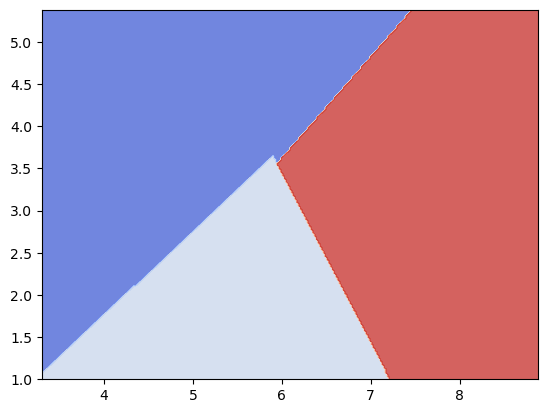

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC

# Load or create your data
# Here, we use the iris dataset as an example
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for simplicity
y = iris.target

# Train the SVC model
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

# Create a mesh to plot the decision boundaries
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Plot the decision contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up grid for plotting
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.show()